<a href="https://colab.research.google.com/github/CleideLustosa/Cleide-Lustosa/blob/main/C%C3%B3pia_de_ProjetoIntegradorParteD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"cleidelustosa","key":"c3b9caef78baa2f81374ff1fb173d6ab"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d redwankarimsony/heart-disease-data

Dataset URL: https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data
License(s): copyright-authors
  0% 0.00/12.4k [00:00<?, ?B/s]
100% 12.4k/12.4k [00:00<00:00, 39.0MB/s]


In [ ]:
!unzip heart-disease-data.zip

Archive:  heart-disease-data.zip
  inflating: heart_disease_uci.csv   


In [ ]:
import pandas as pd

# Leitura do arquivo
df = pd.read_csv('heart_disease_uci.csv')
print(df.head())

   id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4             normal    0  


In [ ]:
#Quantidade de linhas e colunas
df.shape

In [ ]:
#Quais as variáveis
df.info()

In [ ]:
#Verificando valores nulos
df.isnull().sum()

In [ ]:
#Limpeza dados duplicados
df.drop_duplicates(inplace=True)

In [ ]:
#Estatísticas Descritivas
df.describe()

In [ ]:
# Matriz de correlação
correlacao = df.corr(numeric_only=True)

# Visualização a matriz de correlação com um mapa de calor
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(correlacao, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

In [ ]:
#Histograma Idade X Colesterol
# Boxplot da idade
sns.boxplot(x='age', data=df)
plt.title('Distribuição de Idade')
plt.show()

# Boxplot do colesterol
sns.boxplot(x='chol', data=df)
plt.title('Distribuição do Colesterol')
plt.show()

In [ ]:
# Outliers e Anomalias
# Média de idade por sexo
sns.barplot(x='sex', y='age', data=df)
plt.title('Idade Média por Gênero')
plt.show()

# Média de colesterol por sexo
sns.barplot(x='sex', y='chol', data=df)
plt.title('Colesterol Médio por Gênero')
plt.show()

In [ ]:
#Comparação e Segmentação
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Carregando o DataFrame
df = pd.read_csv('heart_disease_uci.csv')
df.drop_duplicates(inplace=True)
# Remover linhas que não tenham informações mínimas para a análise
df.dropna(subset=['sex', 'age', 'chol'], inplace=True)

# Média de idade por sexo
sns.barplot(x='sex', y='age', data=df)
plt.title('Idade Média por Gênero')
plt.show()

# Média de colesterol por sexo
sns.barplot(x='sex', y='chol', data=df)
plt.title('Colesterol Médio por Gênero')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, ConfusionMatrixDisplay,
    RocCurveDisplay
)

RANDOM_STATE = 42

# Pré-processamento
df = pd.read_csv('heart_disease_uci.csv')

# Alvo binário
df['target'] = (df['num'] > 0).astype(int)
df = df.drop(columns=['id','num'])

# Separar numéricas e categóricas
num_cols = df.select_dtypes(include=['int64','float64']).columns.drop('target')
cat_cols = df.select_dtypes(include=['object']).columns

# Pipelines de pré-processamento
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('cat', cat_transformer, cat_cols)
    ]
)

X = df.drop(columns=['target'])
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=RANDOM_STATE, stratify=y
)

print("Treino:", X_train.shape, "Teste:", X_test.shape)

Treino: (690, 14) Teste: (230, 14)


Árvore de Decisão Simplificada - Acurácia: 0.8130434782608695


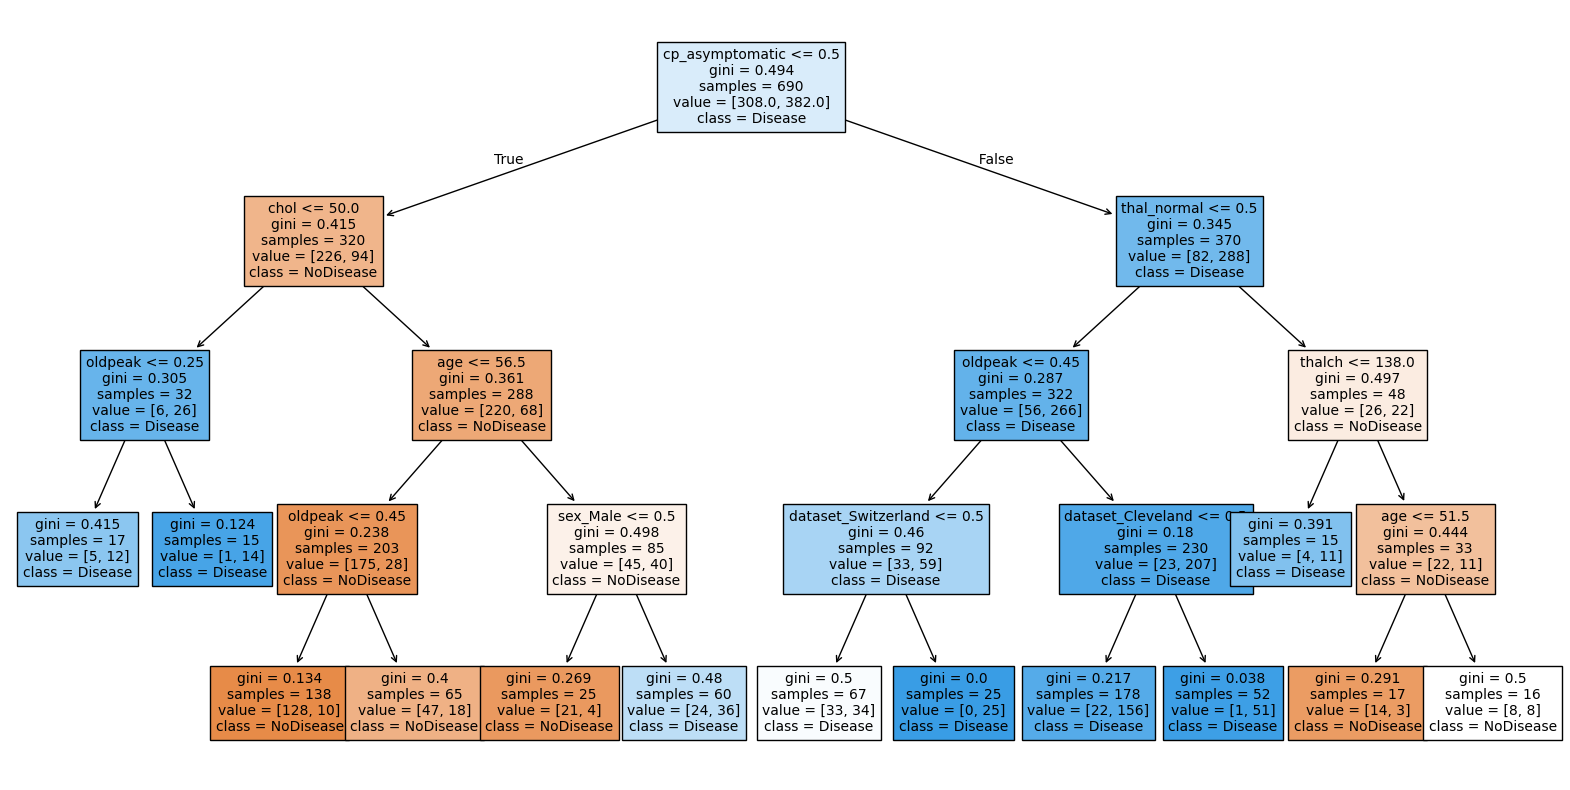

In [ ]:
# Importações e pré-processamento
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

# Semente aleatória e Carrega os dados
RANDOM_STATE = 42
df = pd.read_csv('heart_disease_uci.csv')
df['target'] = (df['num'] > 0).astype(int)
df = df.drop(columns=['id', 'num'])

# Colunas e pré-processadores
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop('target')
cat_cols = df.select_dtypes(include=['object']).columns

num_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='median'))])
cat_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')), ('onehot', OneHotEncoder(handle_unknown='ignore'))])
preprocessor = ColumnTransformer(transformers=[('num', num_transformer, num_cols), ('cat', cat_transformer, cat_cols)])

X = df.drop(columns=['target'])
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=RANDOM_STATE, stratify=y)


# Pipeline com árvore de decisão simplificada
tree_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('clf', DecisionTreeClassifier(random_state=RANDOM_STATE, max_depth=4, min_samples_leaf=15))
])

tree_pipe.fit(X_train, y_train)

# Avaliação do modelo simplificado
y_pred_tree = tree_pipe.predict(X_test)
print("Árvore de Decisão Simplificada - Acurácia:", accuracy_score(y_test, y_pred_tree))

# -------------------
# Plot da árvore de decisão simplificada
# -------------------
clf = tree_pipe.named_steps['clf']
ohe_features = tree_pipe.named_steps['preprocessor'].transformers_[1][1]['onehot'].get_feature_names_out(cat_cols)
all_features = list(num_cols) + list(ohe_features)

plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=all_features, class_names=['NoDisease', 'Disease'], filled=True, fontsize=10)
plt.show()


In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score
)

RANDOM_STATE = 42

# Pré-processamento (Mantido do código anterior)
# O arquivo 'heart_disease_uci.csv' precisa estar na mesma pasta do seu notebook
df = pd.read_csv('heart_disease_uci.csv')

# Alvo binário
df['target'] = (df['num'] > 0).astype(int)
df = df.drop(columns=['id','num'])

# Separar numéricas e categóricas
num_cols = df.select_dtypes(include=['int64','float64']).columns.drop('target')
cat_cols = df.select_dtypes(include=['object']).columns

# Pipelines de pré-processamento
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()) # Adicionado para normalizar dados numéricos, essencial para o KNN
])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('cat', cat_transformer, cat_cols)
    ]
)

X = df.drop(columns=['target'])
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=RANDOM_STATE, stratify=y
)

print("Treino:", X_train.shape, "Teste:", X_test.shape)

# Implementação do KNN e Análise de Métricas
# Pipeline com pré-processamento + KNN
knn_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('clf', KNeighborsClassifier(n_neighbors=5)) # N_neighbors padrão é 5
])

knn_pipe.fit(X_train, y_train)

# Predições
y_pred_knn = knn_pipe.predict(X_test)
y_proba_knn = knn_pipe.predict_proba(X_test)[:, 1]

print("\nKNN — Métricas de Desempenho")
print("Acurácia:", accuracy_score(y_test, y_pred_knn))
print("Precisão:", precision_score(y_test, y_pred_knn))
print("Recall:", recall_score(y_test, y_pred_knn))
print("F1-Score:", f1_score(y_test, y_pred_knn))
print("Área sob a Curva ROC:", roc_auc_score(y_test, y_proba_knn))

Treino: (690, 14) Teste: (230, 14)

KNN — Métricas de Desempenho
Acurácia: 0.8304347826086956
Precisão: 0.8333333333333334
Recall: 0.8661417322834646
F1-Score: 0.8494208494208494
Área sob a Curva ROC: 0.9016512499044416
